[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/Machine_Learning_3rd_edition/blob/master/Volume_II_Python/Part-I-Python/Chapter_2/data_cleaning.ipynb)

# Data cleaning in Python

This notebook provides examples of:

* reading csv files
* removing columns
* dealing with NAs
* checking and changing data types
* factor encoding and one-hot encoding

### Code Accompanying ***The Machine Learning Handbooks***, Volume II, Chapter 2

#### Book pdf is available on the GitHub repo: <https://github.com/kjmazidi/Machine_Learning_3rd_edition>

###### (c) 2025 KJG Mazidi, all rights reserved

This notebook reads a csv file on a personal computer, for how to read in a file in Google Colaboratory, see notebook **colab** in the GitHub repo.

In [3]:
# imports for this notebook
import pandas as pd

In [4]:
### load the data

df = pd.read_csv('../data/diabetes.csv')
print(df.head())
print('\nDimensions of data frame:', df.shape)

   row  pregnant  glucose  pressure  triceps  insulin  mass  pedigree  age  \
0    1         6    148.0      72.0     35.0      NaN  33.6     0.627   50   
1    2         1     85.0      66.0     29.0      NaN  26.6     0.351   31   
2    3         8    183.0      64.0      NaN      NaN  23.3     0.672   32   
3    4         1     89.0      66.0     23.0     94.0  28.1     0.167   21   
4    5         0    137.0      40.0     35.0    168.0  43.1     2.288   33   

  diabetes  
0      pos  
1      neg  
2      pos  
3      neg  
4      pos  

Dimensions of data frame: (768, 10)


In [5]:
# remove "row" and "pedigree" columns

df = df.drop(columns=['row', 'pedigree'])
print(df.head())

   pregnant  glucose  pressure  triceps  insulin  mass  age diabetes
0         6    148.0      72.0     35.0      NaN  33.6   50      pos
1         1     85.0      66.0     29.0      NaN  26.6   31      neg
2         8    183.0      64.0      NaN      NaN  23.3   32      pos
3         1     89.0      66.0     23.0     94.0  28.1   21      neg
4         0    137.0      40.0     35.0    168.0  43.1   33      pos


In [6]:
# check for NAs

df.isnull().sum()

pregnant      0
glucose       5
pressure     35
triceps     227
insulin     374
mass         11
age           0
diabetes      0
dtype: int64

In [8]:
# fill triceps and insulin with average
import numpy as np

tri_mean = np.mean(df.triceps)
df.triceps = df.triceps.fillna(tri_mean)

insulin_mean = np.mean(df.insulin)
df.insulin = df.insulin.fillna(insulin_mean)

df.isnull().sum()

pregnant     0
glucose      5
pressure    35
triceps      0
insulin      0
mass        11
age          0
diabetes     0
dtype: int64

In [9]:
# drop remaining rows with NAs

df = df.dropna()
print('\nDimensions of data frame:', df.shape)


Dimensions of data frame: (724, 8)


In [10]:
# check data types

df.dtypes

pregnant      int64
glucose     float64
pressure    float64
triceps     float64
insulin     float64
mass        float64
age           int64
diabetes     object
dtype: object

In [11]:
# convert diabetes to categorical data type

df1 = df.copy()

df1.diabetes = df1.diabetes.astype('category')

print(df1.dtypes, "\n")
print(df1.head())     

pregnant       int64
glucose      float64
pressure     float64
triceps      float64
insulin      float64
mass         float64
age            int64
diabetes    category
dtype: object 

   pregnant  glucose  pressure   triceps     insulin  mass  age diabetes
0         6    148.0      72.0  35.00000  155.548223  33.6   50      pos
1         1     85.0      66.0  29.00000  155.548223  26.6   31      neg
2         8    183.0      64.0  29.15342  155.548223  23.3   32      pos
3         1     89.0      66.0  23.00000   94.000000  28.1   21      neg
4         0    137.0      40.0  35.00000  168.000000  43.1   33      pos


In [12]:
# convert diabetes to categorical data type with numeric factor codes

df2 = df.copy()

df2.diabetes = df1.diabetes.astype('category').cat.codes

print(df2.dtypes, "\n")
print(df2.head())  

pregnant      int64
glucose     float64
pressure    float64
triceps     float64
insulin     float64
mass        float64
age           int64
diabetes       int8
dtype: object 

   pregnant  glucose  pressure   triceps     insulin  mass  age  diabetes
0         6    148.0      72.0  35.00000  155.548223  33.6   50         1
1         1     85.0      66.0  29.00000  155.548223  26.6   31         0
2         8    183.0      64.0  29.15342  155.548223  23.3   32         1
3         1     89.0      66.0  23.00000   94.000000  28.1   21         0
4         0    137.0      40.0  35.00000  168.000000  43.1   33         1


The diabetes data is ready to go. 

Two ways of encoding categorical data were shown above. The sklearn algorithms handle either type, but the numeric encoding is more commonly used.

### One-hot encoding

Some algorithms can also accept one-hot encoding. As an example of one-hot encoding, we will use a subset of the diabetes data and the number of pregnancies column.

In [13]:
df3 = df.copy()

df3 = df3[df3.pregnant < 5]
print(df3.shape)

(463, 8)


In [14]:
print(df3.head())

   pregnant  glucose  pressure  triceps     insulin  mass  age diabetes
1         1     85.0      66.0     29.0  155.548223  26.6   31      neg
3         1     89.0      66.0     23.0   94.000000  28.1   21      neg
4         0    137.0      40.0     35.0  168.000000  43.1   33      pos
6         3     78.0      50.0     32.0   88.000000  31.0   26      pos
8         2    197.0      70.0     45.0  543.000000  30.5   53      pos


In [15]:
ohe = pd.get_dummies(df3.pregnant)
print(ohe[:5])

       0      1      2      3      4
1  False   True  False  False  False
3  False   True  False  False  False
4   True  False  False  False  False
6  False  False  False   True  False
8  False  False   True  False  False


The ohe (one-hot-encoded) data above has one column for each possible value 0 - 4. Each row will have only one "1" for each row, with the rest 0.

Now we need to concatenate this with the other columns. The example uses a subset of the columns

In [16]:
df_ohe = pd.concat([ohe, df3.loc[:, df3.columns != 'pregnant']], axis=1)
df_ohe.head()

,0,1,2,3,4,glucose,pressure,triceps,insulin,mass,age,diabetes
1,False,True,False,False,False,85.0,66.0,29.0,155.548223,26.6,31,neg
3,False,True,False,False,False,89.0,66.0,23.0,94.000000,28.1,21,neg
4,True,False,False,False,False,137.0,40.0,35.0,168.000000,43.1,33,pos
6,False,False,False,True,False,78.0,50.0,32.0,88.000000,31.0,26,pos
8,False,False,True,False,False,197.0,70.0,45.0,543.000000,30.5,53,pos


### Data investigation

In seeking to improve a model, consider if there could be undetected errors in the data. The following two code blocks show finding the min and max for each column. Most of the ranges seem reasonable. The triceps range of 7 to 99 seems unusual. The third code block below shows the 10 rows with the lowest triceps values. Looking at the first two rows, there doesn't seem to be a strong relationship of triceps to the mass of a person. Finally, a boxplot shows several suspected outliers at the low and high ends of the triceps data. Further investigation into how the data was collected might reveal whether these are likely human errors in measurement.

In [17]:
df.min()


pregnant       0
glucose     44.0
pressure    24.0
triceps      7.0
insulin     14.0
mass        18.2
age           21
diabetes     neg
dtype: object

In [18]:
df.max()

pregnant       17
glucose     199.0
pressure    122.0
triceps      99.0
insulin     846.0
mass         67.1
age            81
diabetes      pos
dtype: object

In [19]:
df.sort_values(by=['triceps']).head(10)

,pregnant,glucose,pressure,triceps,insulin,mass,age,diabetes
519,6,129.0,90.0,7.0,326.000000,19.6,60,neg
254,12,92.0,62.0,7.0,258.000000,27.6,44,pos
382,1,109.0,60.0,8.0,182.000000,25.4,21,neg
434,1,90.0,68.0,8.0,155.548223,24.5,36,neg
313,3,113.0,50.0,10.0,85.000000,29.5,25,neg
671,1,99.0,58.0,10.0,155.548223,25.4,21,neg
279,2,108.0,62.0,10.0,278.000000,25.3,22,neg
55,1,73.0,50.0,10.0,155.548223,23.0,21,neg
466,0,74.0,52.0,10.0,36.000000,27.8,22,neg
50,1,103.0,80.0,11.0,82.000000,19.4,22,neg


<Axes: xlabel='diabetes', ylabel='triceps'>

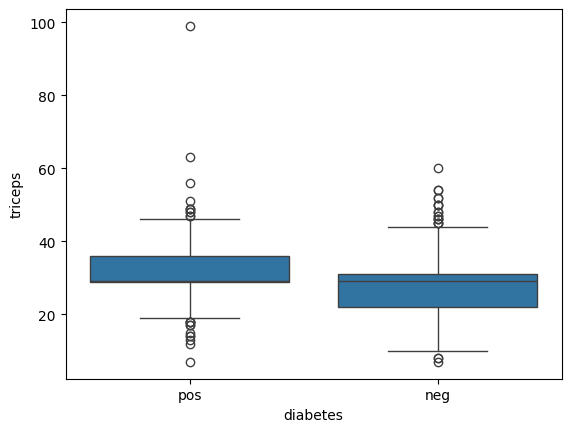

In [21]:
import seaborn as sb

sb.boxplot(data=df, x='diabetes', y='triceps')